In [33]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

##  Data Gathering

In [34]:
df = pd.read_csv(r"C:\Users\Rutuja Salunke\Downloads\9408623-b237fa5848349a14a14e5d4107dc7897c21951f5\9408623-b237fa5848349a14a14e5d4107dc7897c21951f5\wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##  EDA

In [35]:
df.shape

(178, 14)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [37]:
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [38]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##  Feature Engineering

#### To find outliers

In [39]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

lower_tail = Q1- 1.5 * IQR
upper_tail = Q3+ 1.5 * IQR

outliers = (df < lower_tail) | (df > upper_tail)
outliers_count = outliers.sum()
outliers_count

Wine                    0
Alcohol                 0
Malic.acid              3
Ash                     3
Acl                     4
Mg                      4
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 2
Color.int               4
Hue                     1
OD                      0
Proline                 0
dtype: int64

#### To replace outliers

In [40]:
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Malic.acid","Ash","Acl","Mg","Proanth","Color.int","Hue"]
Finding_outliar1(df,columns)

-0.6174999999999997
5.3025
1.6887499999999998
3.0787500000000003
10.749999999999998
27.950000000000003
59.5
135.5
0.20000000000000018
3.0
-1.2500000000000009
10.670000000000002
0.2762499999999998
1.6262500000000002


# PCA

In [41]:
Std = StandardScaler()
Standard_array = Std.fit_transform(df)
Df_Std = pd.DataFrame(Standard_array, columns = df.columns)
Df_Std.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,-1.213944,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,-1.213944,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,-1.213944,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,-1.213944,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,-1.213944,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [80]:
cov_matrix = np.cov(Df_Std.T)
cov_matrix

array([[ 1.00564972, -0.3300763 ,  0.44290993, -0.0479489 ,  0.52857771,
        -0.22553135, -0.72322641, -0.85228566,  0.49187249, -0.51542323,
         0.26173003, -0.62506063, -0.79268286, -0.63729711],
       [-0.3300763 ,  1.00564972,  0.09529158,  0.2214182 , -0.31395502,
         0.30388006,  0.29073446,  0.23815287, -0.15681042,  0.15403617,
         0.55220976, -0.06753548,  0.07275191,  0.64735687],
       [ 0.44290993,  0.09529158,  1.00564972,  0.16755524,  0.29755329,
        -0.03955084, -0.34096566, -0.41721865,  0.29586545, -0.2358999 ,
         0.26639339, -0.56960856, -0.37468661, -0.19225258],
       [-0.0479489 ,  0.2214182 ,  0.16755524,  1.00564972,  0.43012909,
         0.32433258,  0.12513898,  0.09811293,  0.18470352,  0.00611461,
         0.25825004, -0.07633311, -0.01127709,  0.23097325],
       [ 0.52857771, -0.31395502,  0.29755329,  0.43012909,  1.00564972,
        -0.09858424, -0.33492783, -0.36545785,  0.37136184, -0.20997347,
         0.00980346, -0.28

In [81]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values

array([5.60458768, 2.56375389, 1.42651378, 0.93195358, 0.84238847,
       0.66542266, 0.528459  , 0.05699541, 0.13456214, 0.3596558 ,
       0.17366731, 0.29687634, 0.26475628, 0.2295037 ])

In [82]:
eigen_vectors

array([[ 0.39251008,  0.00496269, -0.00556301, -0.10939511,  0.15361959,
        -0.21739957, -0.04409867,  0.66431314, -0.49647966, -0.05192726,
        -0.04619357, -0.1555718 , -0.21033925, -0.0052211 ],
       [-0.1377818 ,  0.47689882, -0.2019702 ,  0.04501331, -0.26742089,
         0.14074785, -0.14540143,  0.09244739, -0.01635067, -0.38030219,
        -0.23655023, -0.50512106,  0.28157254, -0.23338822],
       [ 0.22329763,  0.22541809,  0.08624025, -0.47958192, -0.12432757,
         0.6199064 ,  0.35608698, -0.02332232,  0.04622811, -0.0954    ,
         0.09693893,  0.01125568, -0.32786281,  0.08092856],
       [-0.0009843 ,  0.31850888,  0.62967078,  0.23727958, -0.08938002,
         0.1024996 , -0.17992039,  0.0099369 , -0.15076789,  0.12689988,
        -0.01781974,  0.29092581, -0.11058932, -0.50870354],
       [ 0.22883621, -0.01538238,  0.60797016, -0.09015793,  0.05741038,
        -0.11152861, -0.27856523, -0.10117953,  0.18511242, -0.3710201 ,
        -0.0673936 , -0.17

In [83]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
sorted_eigenvalue

array([5.60458768, 2.56375389, 1.42651378, 0.93195358, 0.84238847,
       0.66542266, 0.528459  , 0.3596558 , 0.29687634, 0.26475628,
       0.2295037 , 0.17366731, 0.13456214, 0.05699541])

In [64]:
x = Df_Std.iloc[:,1:]
x

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.709072,0.316696,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.180674,-1.399735,-1.231206,-0.021952
174,0.493343,1.439792,0.430781,1.074241,0.188156,-0.793334,-1.284344,0.549108,-0.316336,1.003253,-1.134784,-1.485445,0.009893
175,0.332758,1.777051,-0.405838,0.159191,1.533804,-1.129824,-1.344582,0.549108,-0.424137,2.289557,-1.620528,-1.485445,0.280575
176,0.209232,0.236596,0.012471,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.890359,-1.576370,-1.400699,0.296498


In [65]:
y = df.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

### Model training

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [67]:
PCA_1= PCA(n_components=2)
xtrain = PCA_1.fit_transform(xtrain)
xtest  = PCA_1.fit_transform(xtest)

In [68]:
PCA_1.explained_variance_ratio_

array([0.38285822, 0.19356259])

In [69]:
log1 = LogisticRegression(multi_class="ovr")
log_model1 = log1.fit(xtrain,ytrain)
log_model1

LogisticRegression(multi_class='ovr')

##### training

In [70]:
ytrain 

95     2
91     2
24     1
109    2
121    2
      ..
113    2
64     2
15     1
125    2
9      1
Name: Wine, Length: 142, dtype: int64

In [71]:
ytrain_pred = log_model1.predict(xtrain)
ytrain_pred

array([1, 2, 1, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1,
       3, 1, 1, 2, 3, 3, 1, 3, 3, 1, 2, 3, 1, 2, 3, 3, 2, 3, 1, 2, 1, 2,
       1, 2, 2, 3, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 1, 1, 2, 2, 2, 3, 1, 2,
       1, 1, 1, 1, 3, 2, 2, 3, 3, 2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1,
       2, 2, 3, 2, 1, 2, 3, 3, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 3, 1, 1, 1,
       1, 3, 3, 3, 2, 2, 2, 1, 2, 1], dtype=int64)

In [72]:
accuracy = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.971830985915493


In [73]:
Training_confusion_matrix = confusion_matrix(ytrain,ytrain_pred)
print(Training_confusion_matrix)

[[47  2  0]
 [ 2 51  0]
 [ 0  0 40]]


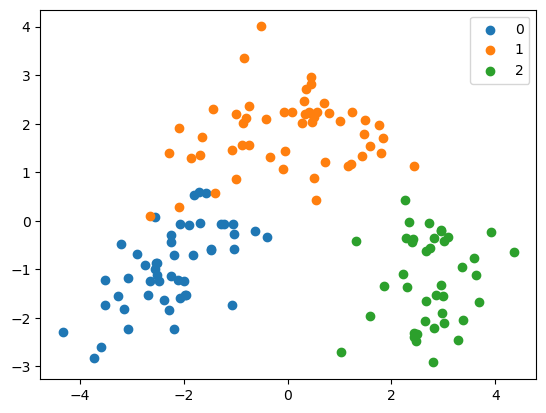

In [74]:
X_set,y_set = xtrain, ytrain

plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1], label=0)
plt.scatter(X_set[y_set==2,0],X_set[y_set==2,1],label=1)
plt.scatter(X_set[y_set==3,0],X_set[y_set==3,1], label=2)
 
plt.legend()                                     
plt.show()

#### testing

In [75]:
ytest 

69     2
103    2
20     1
116    2
56     1
97     2
117    2
39     1
172    3
10     1
19     1
66     2
55     1
61     2
102    2
59     2
83     2
78     2
110    2
163    3
1      1
160    3
47     1
49     1
67     2
136    3
68     2
133    3
60     2
76     2
171    3
170    3
70     2
168    3
124    2
26     1
Name: Wine, dtype: int64

In [76]:
ytest_pred = log_model1.predict(xtest)
ytest_pred

array([2, 2, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 2, 2, 2, 3, 2, 2, 3, 1, 3,
       1, 1, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 1, 1], dtype=int64)

In [77]:
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9166666666666666


In [78]:
testing_confusion_matrix = confusion_matrix(ytest,ytest_pred)
print(testing_confusion_matrix)

[[10  0  0]
 [ 1 15  2]
 [ 0  0  8]]


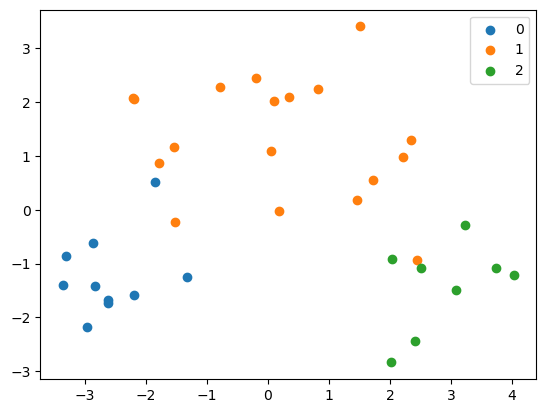

In [79]:
X_set,y_set = xtest, ytest

plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1], label=0)
plt.scatter(X_set[y_set==2,0],X_set[y_set==2,1],label=1)
plt.scatter(X_set[y_set==3,0],X_set[y_set==3,1], label=2)
 
plt.legend()                                     
plt.show()